In [1]:
!pip install shapely==1.6b4

In [2]:
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
from shapely.ops import cascaded_union

In [4]:
p0 = Polygon([[0, 0], [1, 0], [1, 1], [0, 1]])

In [5]:
p1 = Polygon([[0.5, 0.5], [1.5, 0.5], [1.5, 1.5], [0.5, 1.5]])

In [6]:
p2 = Polygon([[1, 1], [2, 1], [2, 2], [1, 2]])

In [7]:
p3 = Polygon([[1, 0], [2, 0], [2, 1], [1, 1]])

In [8]:
p4 = Polygon([[0.25, 0.25], [0.75, 0.25], [0.75, 0.75], [0.25, 0.75]])

In [9]:
p5 = Polygon([[0.75, 0.25], [1.25, 0.25], [1.25, 0.75], [0.75, 0.75]])

In [10]:
p6 = Polygon([[1.0, 0.25], [1.5, 0.25], [1.5, 0.75], [1.0, 0.75]])

In [11]:
p0, p1, p2, p3, p4, p5, p6

(<shapely.geometry.polygon.Polygon at 0x7f1b2357f990>,
 <shapely.geometry.polygon.Polygon at 0x7f1b2357fc90>)

In [12]:
def plotpoly(bbuf):
    c=np.random.rand(3,)
    x,y=bbuf.exterior.coords.xy
    plt.plot(x,y,c=c)
    
def plotpolys(bbuf):
    plotmargin = 0.25
    for n in range(len(bbuf)):
        c=np.random.rand(3,)
        x,y=bbuf[n].exterior.coords.xy
        plt.plot(x,y,c=c)
    x0, x1, y0, y1 = plt.axis()
    plt.axis((x0 - plotmargin,
          x1 + plotmargin,
          y0 - plotmargin,
          y1 + plotmargin))

In [13]:
def plotpolynum(bbuf,ax,c,nstr):
    xc,yc=bbuf.centroid.xy
    print(xc[0],yc[0])
    plt.text(xc[0],yc[0],nstr)

In [14]:
def printpolysrelationships(a,b):
    print 'Intersects Touches Crosses Overlaps Within Contains Disjoint Relate'
    intersects=str(a.intersects(b))
    touches=str(a.touches(b))
    crosses=str(a.crosses(b))
    overlaps=str(a.overlaps(b))
    within=str(a.within(b))
    contains=str(a.contains(b))
    disjoint=str(a.disjoint(b))
    relate=str(a.relate(b))
    printstring = "{:10} {:7} {:7} {:8} {:6} {:8} {:8} {}"
    print printstring.format(intersects, touches, crosses, overlaps, within, contains, disjoint, relate)

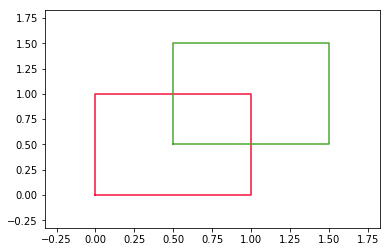

In [15]:
plotpolys([p0,p1])

In [16]:
printpolysrelationships(p0,p1)

Intersects Touches Crosses Overlaps Within Contains Disjoint Relate
True       False   False   True     False  False    False    212101212


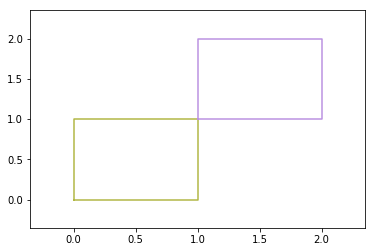

In [17]:
plotpolys([p0,p2])

In [18]:
printpolysrelationships(p0,p2)

Intersects Touches Crosses Overlaps Within Contains Disjoint Relate
True       True    False   False    False  False    False    FF2F01212


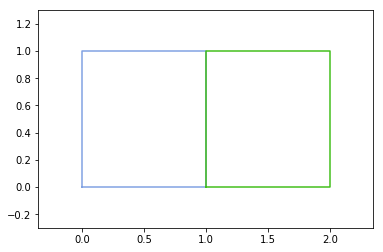

In [19]:
plotpolys([p0,p3])

In [20]:
printpolysrelationships(p0,p3)

Intersects Touches Crosses Overlaps Within Contains Disjoint Relate
True       True    False   False    False  False    False    FF2F11212


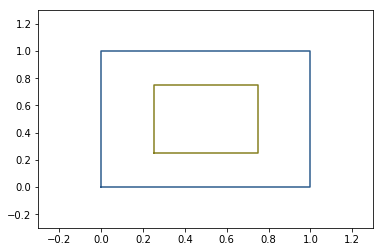

In [21]:
plotpolys([p0,p4])

In [22]:
printpolysrelationships(p0,p4)
printpolysrelationships(p4,p0)

Intersects Touches Crosses Overlaps Within Contains Disjoint Relate
True       False   False   False    False  True     False    212FF1FF2
Intersects Touches Crosses Overlaps Within Contains Disjoint Relate
True       False   False   False    True   False    False    2FF1FF212


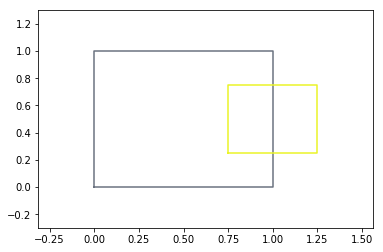

In [23]:
plotpolys([p0,p5])

In [24]:
printpolysrelationships(p0,p5)

Intersects Touches Crosses Overlaps Within Contains Disjoint Relate
True       False   False   True     False  False    False    212101212


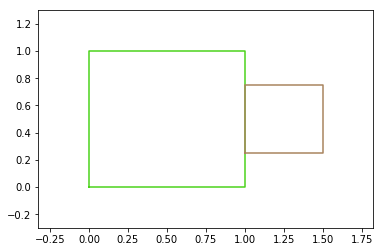

In [25]:
plotpolys([p0,p6])

In [26]:
printpolysrelationships(p0,p6)

Intersects Touches Crosses Overlaps Within Contains Disjoint Relate
True       True    False   False    False  False    False    FF2F11212


In [27]:
bsize=0.1

In [28]:
p7=p0.buffer(bsize)

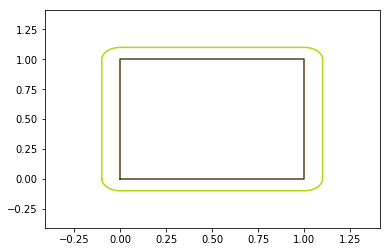

In [29]:
plotpolys([p0,p7])

In [30]:
printpolysrelationships(p0,p7)
printpolysrelationships(p7,p0)

Intersects Touches Crosses Overlaps Within Contains Disjoint Relate
True       False   False   False    True   False    False    2FF1FF212
Intersects Touches Crosses Overlaps Within Contains Disjoint Relate
True       False   False   False    False  True     False    212FF1FF2


In [31]:
p8=p7.buffer(-bsize)

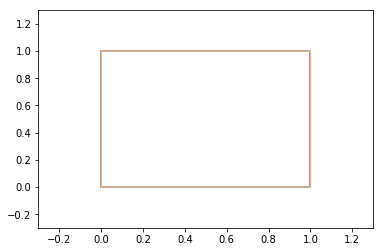

In [32]:
plotpolys([p0,p8])

In [33]:
printpolysrelationships(p0,p8)

Intersects Touches Crosses Overlaps Within Contains Disjoint Relate
True       False   False   False    False  True     False    212F11FF2


In [34]:
s0 = Polygon([[0, 0], [0.3, 0], [0.3, 0.3], [0, 0.3]])

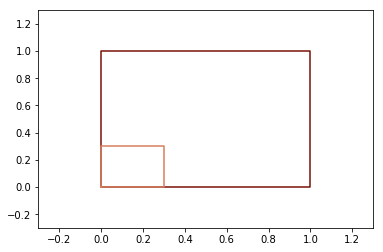

In [35]:
plotpolys([p0,s0])

In [36]:
printpolysrelationships(p0,s0)
printpolysrelationships(s0,p0)

Intersects Touches Crosses Overlaps Within Contains Disjoint Relate
True       False   False   False    False  True     False    212F11FF2
Intersects Touches Crosses Overlaps Within Contains Disjoint Relate
True       False   False   False    True   False    False    2FF11F212


In [37]:
p9=p0.buffer(-bsize)

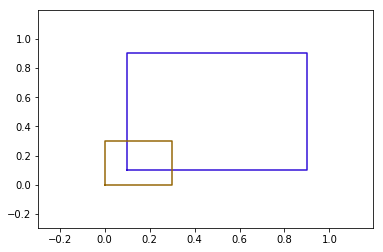

In [38]:
plotpolys([p9,s0])

In [39]:
printpolysrelationships(p9,s0)

Intersects Touches Crosses Overlaps Within Contains Disjoint Relate
True       False   False   True     False  False    False    212101212


In [40]:
p10=p9.buffer(bsize)

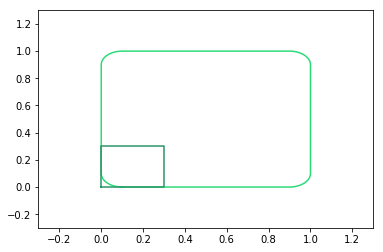

In [41]:
plotpolys([p10,s0])

In [42]:
printpolysrelationships(p10,s0)

Intersects Touches Crosses Overlaps Within Contains Disjoint Relate
True       False   False   True     False  False    False    212101212


In [43]:
p4a=p4.buffer(0.1)

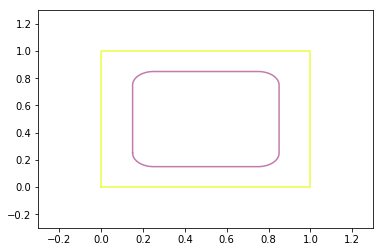

In [44]:
plotpolys([p0,p4a])

In [45]:
printpolysrelationships(p0,p4a)
printpolysrelationships(p4a,p0)

Intersects Touches Crosses Overlaps Within Contains Disjoint Relate
True       False   False   False    False  True     False    212FF1FF2
Intersects Touches Crosses Overlaps Within Contains Disjoint Relate
True       False   False   False    True   False    False    2FF1FF212
